In [1]:
import os 
import shutil

In [2]:
class_0 = [i for i in os.listdir() if i[-5:] == '0.jpg']  
class_1 = [i for i in os.listdir() if i[-5:] == '1.jpg']

In [3]:
all_classes = [class_0, class_1]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [5]:
IMG_SIZE = 100

training_data = []

def create_training_data():
    for category in [0,1]:  # do labels 1 and 0

        for img in all_classes[category]:  # iterate over each image per assigned label
            try:
                img_array = cv2.imread(img)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, category])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

In [6]:
import random
random.shuffle(training_data)

In [7]:
len(training_data)

106

In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
# y = np.array(y)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history = model.fit(X, y, batch_size=4, epochs=30, validation_split=0.4, callbacks=[callback])



Epoch 1/30
16/16 [==============================] - 2s 84ms/step - loss: 5.0138 - accuracy: 0.3651 - val_loss: 0.6915 - val_accuracy: 0.6512
Epoch 2/30
16/16 [==============================] - 1s 41ms/step - loss: 0.6912 - accuracy: 0.6667 - val_loss: 0.6617 - val_accuracy: 0.6512
Epoch 3/30
16/16 [==============================] - 1s 41ms/step - loss: 0.6800 - accuracy: 0.5714 - val_loss: 0.6951 - val_accuracy: 0.4651
Epoch 4/30
16/16 [==============================] - 1s 42ms/step - loss: 0.6824 - accuracy: 0.7143 - val_loss: 0.7117 - val_accuracy: 0.3953
Epoch 5/30
16/16 [==============================] - 1s 41ms/step - loss: 0.6723 - accuracy: 0.7302 - val_loss: 0.7383 - val_accuracy: 0.4186
Epoch 6/30
16/16 [==============================] - 1s 41ms/step - loss: 0.5626 - accuracy: 0.7143 - val_loss: 0.6918 - val_accuracy: 0.4419
Epoch 7/30
16/16 [==============================] - 1s 41ms/step - loss: 0.3954 - accuracy: 0.9048 - val_loss: 0.7593 - val_accuracy: 0.5581
Epoch 8/30
16

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X).round(), y)

0.8207547169811321

In [26]:
import pandas as pd
df = pd.DataFrame(history.history)

In [27]:
import pandas as pd
df = pd.DataFrame(history.history)

In [28]:
df['epoch'] = list(range(1, len(df) +1))

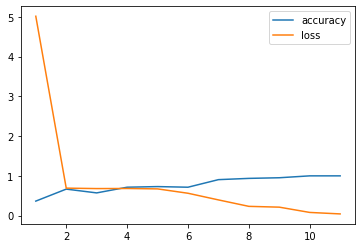

In [32]:
plt.plot(df.epoch, df.accuracy, label ='accuracy')
#plt.plot(df.epoch, df.val_accuracy, label = 'val_accuracy')
plt.plot(df.epoch, df.loss, label = 'loss')
plt.legend()


In [30]:
df


,loss,accuracy,val_loss,val_accuracy,epoch
0,5.013793,0.365079,0.691537,0.651163,1
1,0.691159,0.666667,0.661746,0.651163,2
2,0.680042,0.571429,0.695105,0.465116,3
3,0.682379,0.714286,0.711653,0.395349,4
4,0.672281,0.730159,0.738307,0.418605,5
5,0.562649,0.714286,0.691795,0.441860,6
6,0.395411,0.904762,0.759297,0.558140,7
7,0.233074,0.936508,1.068889,0.581395,8
8,0.212925,0.952381,1.008366,0.511628,9
9,0.080276,1.000000,1.455997,0.558140,10
